<div style="border:solid green 2px; padding: 20px">

<b>Привет, Максим! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Введение

Были переданы данные о некоторых пользователях из нескольких городов приложения GoFast, а также об их поездках. Будут проанализированы данные и проверены некоторые гипотезы, которые могут помочь бизнесу вырасти.

Будут выполнены следующие шаги:
- загружены и обработаны данные
- проведен исследовательский анализ данных
- данные будут объединены и приведены в надлежайший вид для проверки гипотез
- будут составлены и проверены гипотезы
- сделаны выводы

Загрузим необходимые библиотеки и укажем настройки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows',None)

#### Шаг 1. Загрузка данных

Загрузим и рассмотри данные

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [9]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательно, что знакомишься с датафреймом выводя и несколько первых строк и обзорную информацию при помощи `info`

Вывод к первому шагу:
Успешно загрузили и вывели данные из 3-х исходных таблиц. Пропусков не наблюдается, необходимо поменять формат данных на тип "дата" в таблице поездки

#### Шаг 2. Предобработка данных

Переведем тип данных на "datetime" и выведем дополнительный столбец с номером месяца

In [10]:
rides['date']=pd.to_datetime(rides['date'])
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [11]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Как проверили ранее, в таблицах нет пропусков. Проверим дубликаты

In [12]:
users.loc[users.duplicated(keep=False)].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
46,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
71,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
107,108,Влада,29,Тюмень,ultra


Присутствуют дубликаты пользователей. Уберем дубликаты

In [13]:
users.drop_duplicates(inplace=True)

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

<div class="alert alert-info"> <b>Комментарий студента:</b> Прорабатываю аномальные записи.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
И эта проблема тобой обнаружена, молодец. Возможно это так сократилось 30 минут, так как нет поездок ровно с 30 минутами гипотеза не лишена оснований, хоть и странная).
    
Здесь хочется обратить внимание на то, как можно подходить к проверке корректности даннных, в этом пункте ты сделал вывод о некорректности данных формально на основе скорости, скорость оказалось запредельной в таких поездках и это странно, как и в случае с довольно короткими по дистанции, но до нескольких минут по времени поездками. И можно было посчитать скорость по каждой поездке и изучить этот график. В прошлом проекте возможно было оценить стоимость квадратного метра, если в каких-то объектах она аномально - стоит подробнее изучить

Проверим датасет поездки на аномально короткие поездки

In [15]:
rides.loc[rides['duration']<10].sort_values(by='duration')

,user_id,distance,duration,date,month
7932,804,5547.830031,0.500000,2021-05-10,5
11822,1088,4533.964591,0.500000,2021-11-23,11
6860,724,6225.520342,0.500000,2021-12-16,12
10457,989,5035.104114,0.500000,2021-12-09,12
9077,893,4762.120493,0.500000,2021-03-18,3
14829,1304,4899.706877,0.500000,2021-07-28,7
11853,1090,5121.403392,0.500000,2021-09-29,9
10484,991,4753.927778,0.500000,2021-07-23,7
14677,1293,4704.878192,0.500000,2021-02-13,2
14615,1287,5944.789947,0.500000,2021-12-09,12


Наблюдаем, что присутствуют записи, где за пол минуты проезжают от 4 до 6 км. Посчитаем их

In [16]:
rides.loc[rides['duration']==0.500000].sort_values(by='duration').count()

user_id     95
distance    95
duration    95
date        95
month       95
dtype: int64

Скорее всего, возникла ошибка при записи этих поездок.Их относительно немного, соответственно для чистоты данных уберем их

In [17]:
rides = rides.drop(rides[rides.duration == 0.500000].index)
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 842.5 KB


Вывод ко второму шагу: Изменили типы данных, добавили дополнительные столбцы. Убрали дубликаты в таблицах, убрали аномальные значения

#### Шаг 3. Исследовательский анализ данных

Визуализируем частоту встречаемости городов

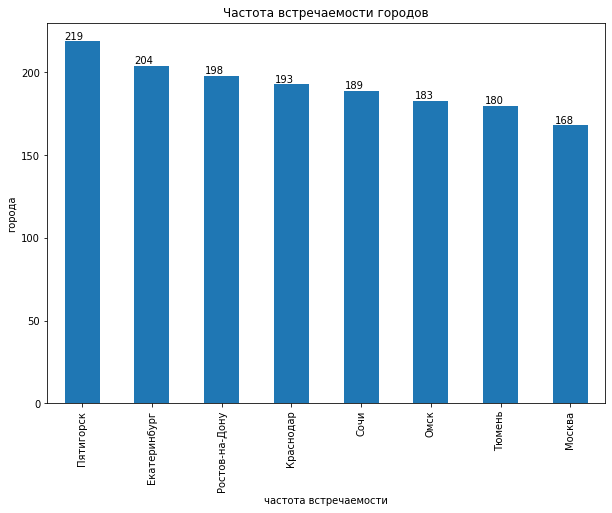

In [18]:
plt.rcParams["figure.figsize"] = [10, 7]

a = users.value_counts(subset='city').plot.bar(x='city', y='user_id', title='Частота встречаемости городов')
a.set(xlabel="частота встречаемости", ylabel="города")
for p in a.patches:
    a.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

* Прошу нанести на графики подписи осей, добавить заголовок. Чтобы разобраться с подписями рекомендую вот [эту статью](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/)
* И здесь хотелось видеть абсолютное число пользователей по городам численно, просто вывод `value_counts`

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Здесь и далее добавлены подписи осей и загаловки.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Отлично, это будет важно для ревьюеров и следующих проектов, спасибо!

Можно сделать следующие наблюдения:
- имеется информация по использованию приложения в 8 городах;
- наибольшей популярностью приложение пользуется в Пятигорске, наименьшей - в Москве

Визуализируем соотношение пользователей с подпиской и без

<AxesSubplot:title={'center':'Соотношение подписчиков и бесплатных пользователей'}, ylabel='None'>

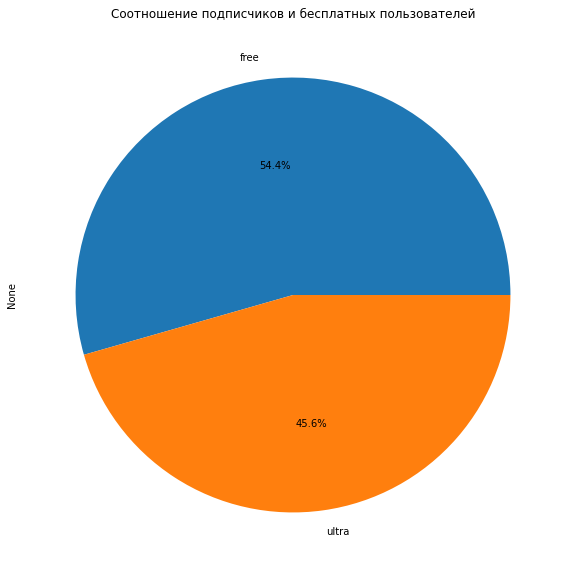

In [19]:
a = (users.value_counts(subset='subscription_type')
     .plot.pie(y='subscription_type', 
               autopct='%1.1f%%', 
               figsize=(10,10), 
               title='Соотношение подписчиков и бесплатных пользователей'))
a

Наблюдаем, что пользователей без подписки больше примерно на 10% 

Визуализируем возраст пользователей

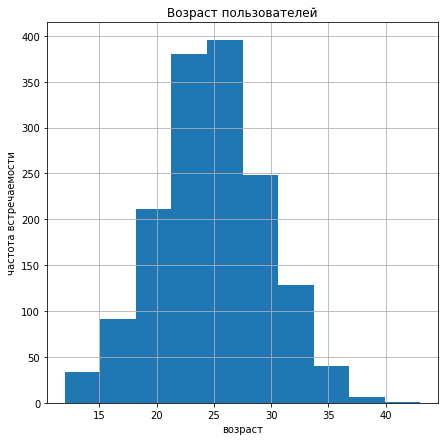

In [20]:
plt.rcParams["figure.figsize"] = [7, 7]

a = users['age'].hist(bins=10)
a.set(title='Возраст пользователей',xlabel="возраст", ylabel="частота встречаемости")
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Есть акцент и на довольно юных пользователях, кстати здесь вопрос, а законадательно возможно ли это. Такие факты хорошо бы проверять, выходя чуть за рамки непосредственно задания

Наиболее популярно приложение у пользователей 22-27 лет

Визуализируем дистанцию 

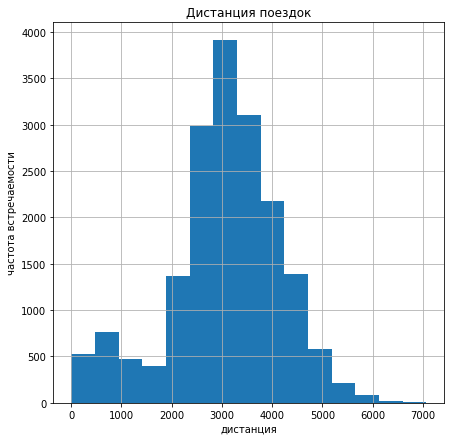

In [21]:
a = rides['distance'].hist(bins=15)
a.set(title='Дистанция поездок',xlabel="дистанция", ylabel="частота встречаемости")
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Было бы хорошо побольше столбцов вывести, так удалось бы больше пиков выявить 

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывел больше столбцов.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Можно было бы прям кратно больше, но как тебе удобно </div>

Преобладают поездки на на 3-3.5 км. Имеют место поездки на более короткую дистанцию, практически нет поездок на дистанции больше 6 километров

Визуализируем продолжительность поездок

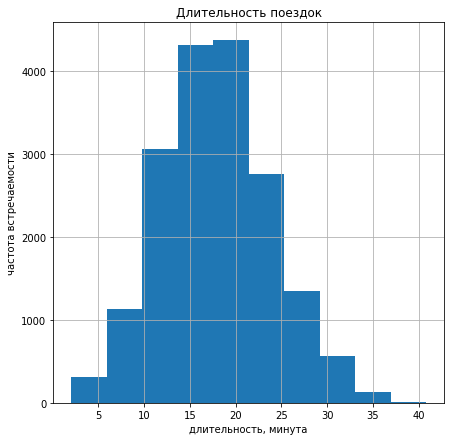

In [22]:
a = rides['duration'].hist(bins=10)
a.set(title='Длительность поездок',xlabel="длительность, минута", ylabel="частота встречаемости")
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Рекомендовал бы внимательнее рассмотреть поездки, которые длились до минуты, это похоже на аномалии и стоит убедиться, короткие ли это поездки или какие-то сбои логирования
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Рассмотрел короктие поездки выше.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Благодарю, выше поделился, как можно подходить к анализу 
</div>

Преобладают поездки длительностью 15-20 минут

Можно сделать следующие выводы:
- наибольшей популярностью приложение пользуется в Пятигорске, Екатеринбурге и Ростове-на-Дону. Однако, сильной вариативности в кол-ве пользователей среди городов не наблюдается, поэтому можно говорить, что все населенные пункты важны;
- пользователей без подписок больше примерно на 10%, однако конверсия почти 45% - это хороший показатель;
- наибольшей популярностью приложение пользуется у молодых людей, которые уже имеют собственный доход (22-27 лет);
- наиболее частые поездки происходят на дистанции до 3.5 км и занимают не более 21 минуты

#### Шаг 4. Объединение данных

Объединим таблицы в одну общую таблицу

In [23]:
users.info()
rides.info()
subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 842.5 KB
<class 'panda

In [24]:
auf = pd.merge(users, rides, on='user_id')
auf = pd.merge(auf, subs, on='subscription_type')
auf.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [25]:
auf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int64         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Можно сказать, что:
- пропусков в таблице нет
- размер совпадает с ожидаемым (размер ДФ rides - 17973 позиции)

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

Разделим данные на данные пользователей с подписками и без

In [26]:
d1 = auf.loc[auf['subscription_type']=='ultra']
d1['duration'] = np.ceil(d1['duration'])

/tmp/ipykernel_63/2056689607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['duration'] = np.ceil(d1['duration'])


In [27]:
d2 = auf.loc[auf['subscription_type']=='free']
d2['duration'] = np.ceil(d2['duration'])

/tmp/ipykernel_63/3807075277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['duration'] = np.ceil(d2['duration'])


<div class="alert alert-info"> <b>Комментарий студента:</b> Округлил значение времени раньше.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Теперь расчет доход совпал с ожиданиями

</div>

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

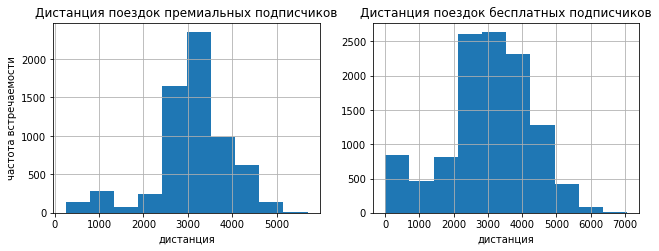

In [28]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
fig, axes = plt.subplots(1, 2)

a = d1['distance'].hist(bins=10, ax=axes[0])
a.set(title='Дистанция поездок премиальных подписчиков',xlabel="дистанция", ylabel="частота встречаемости")
b = d2['distance'].hist(bins=10, ax=axes[1])
b.set(title='Дистанция поездок бесплатных подписчиков',xlabel="дистанция")
plt.show()

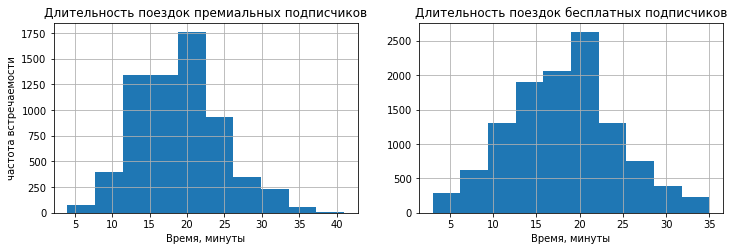

In [29]:
plt.rcParams["figure.figsize"] = [12, 3.50]
fig, axes = plt.subplots(1, 2)

a = d1['duration'].hist(bins=10, ax=axes[0])
a.set(title='Длительность поездок премиальных подписчиков',xlabel="Время, минуты", ylabel="частота встречаемости")
b = d2['duration'].hist(bins=10, ax=axes[1])
b.set(title='Длительность поездок бесплатных подписчиков',xlabel="Время, минуты")
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Ниже продемонстрировал, что имел ввиду) 
</div>

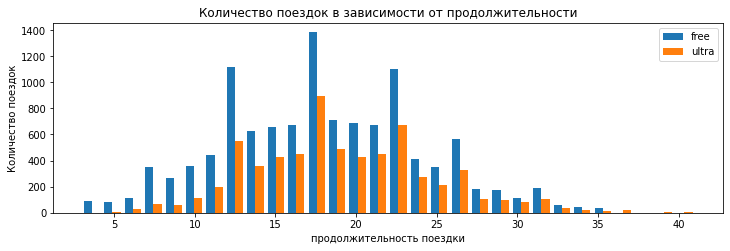

In [31]:
# Код ревьюера

plt.hist([d2['duration'], d1['duration']], bins=30, label=['free', 'ultra'])
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right');

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

А здесь напомню о важности подписывать оси и добавлять заголовок графикам
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывел графики на одну ось.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Проще сравнивать распределения на одном графике, поэтому рекомендовал бы продолжительность двух категорий расположить на одном графике, аналогично с расстоянием
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

Наблюдаем следующие тенденции:
- пользователи с платными подписками склоны совершать поездки на более длительные дистанции
- пользователи с платными подписками чаще совершают длительные поездки (35+ минут)

В качестве выводы, таблицы были успешно объединены и разделены по признаку наличия подписки. Были визуализированны длительность и дистанции поездок разных пользователей

#### Шаг 5. Подсчёт выручки

Создадим датафреймы на основе ранее созданных таблиц с агрегированными данными по кол-ву поездок, общей дистанции и длительности. Данные будут разделены по пользователям и месяцам.

In [30]:
def rev_table(dataframe):
    var = (dataframe.groupby(['user_id', 'month'], as_index=False)[['distance','duration']]
           .agg(['count','sum'])
           .reset_index()
           .droplevel(level=1, axis=1)
           .set_axis(['user_id', 'month', 'amount_rides', 'total_dist', 'amount_dur', 'total_dur'], axis=1)
           .drop('amount_dur', axis=1))
    return var

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Округление предполагалось до агрегации, ещё на этапе датафрейма `d1`
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Округление выполнил ранее, убрал из функции.</div>

In [31]:
full_data1 = rev_table(d1)
full_data1.head()

,user_id,month,amount_rides,total_dist,total_dur
0,1,1,2,7027.511294,42.0
1,1,4,1,754.159807,7.0
2,1,8,2,6723.470560,46.0
3,1,10,2,5809.911100,32.0
4,1,11,3,7003.499363,56.0


In [32]:
full_data2 = rev_table(d2)
full_data2.head()

,user_id,month,amount_rides,total_dist,total_dur
0,700,1,1,2515.690719,15.0
1,700,2,5,13446.659764,89.0
2,700,3,1,3798.334905,19.0
3,700,4,1,2984.551206,16.0
4,700,6,2,5927.650988,29.0


Добавим к каждом датафрейму столбец с выручкой

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8
   - стоимость старта (начала поездки) — 50
    
с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6
   - стоимость старта — бесплатно.

In [33]:
full_data1['revenue'] = 0*full_data1['amount_rides']+6*full_data1['total_dur']+199
full_data2['revenue'] = 50*full_data2['amount_rides']+8*full_data2['total_dur']+0

In [34]:
full_data1.head()

,user_id,month,amount_rides,total_dist,total_dur,revenue
0,1,1,2,7027.511294,42.0,451.0
1,1,4,1,754.159807,7.0,241.0
2,1,8,2,6723.470560,46.0,475.0
3,1,10,2,5809.911100,32.0,391.0
4,1,11,3,7003.499363,56.0,535.0


In [35]:
full_data2.head()

,user_id,month,amount_rides,total_dist,total_dur,revenue
0,700,1,1,2515.690719,15.0,170.0
1,700,2,5,13446.659764,89.0,962.0
2,700,3,1,3798.334905,19.0,202.0
3,700,4,1,2984.551206,16.0,178.0
4,700,6,2,5927.650988,29.0,332.0


Были успешно созданы датафреймы по разделенным таблицам с аггрегироваными данными. Также были добавлены столбцы с выручкой

#### Шаг 6. Проверка гипотез

На основе полученных датасетов, начнем проверку гипотез

1 гипотеза - Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

Необходимо проверить гипотезу, используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза - среднее значение длительности поездок пользователей с подпиской и без равны

Альтернаятивная гипотеза - среднее значение длительности поездок пользователей с подпиской больше, чем среднее значение длительности поездок пользователей без подписки

In [36]:
var1 = d1['duration'].mean()
var2 = d2['duration'].mean()
print(round(var1,2), round(var2,2))

19.04 18.03


In [37]:
a = d1['duration']
b = d2['duration']
alpha = 0.05

test = st.ttest_ind(a, b, alternative='greater')

print(f'p-value: {test.pvalue}')

if test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 8.577910347796266e-28
Отвергаем нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Предполагалась проверка по не агрегированным сведениям, на основе датафреймов `d1`, `d2`
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Провел проверку на основе верных датафреймов, изменил выводы.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Замечательно и за вывод средних спасибо 

</div>

Отвергаем нулевую гипотезу. Действительно,  среднее значение длительности поездок пользователей с подпиской больше, чем среднее значение длительности поездок пользователей без подписки

2 гипотеза - Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3 130 метров? 

Нулевая гипотеза - пользователи с подпиской проезжают не больше 3130 метров за одну поездку

Альернативная гипотеза - пользователи с подпиской проезжают дистанцию, отличную от 3130 метров за одну поездку

In [38]:
var1 = d1['distance']
var2 = 3130
alpha = 0.05

results = st.ttest_1samp(var1, var2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.16092623043004292
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу проверить на основе `d1`, а не рассчитывать длительности поездок 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверил на нужном датафрейме</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Было бы хорошо ещё использовать одностороннюю гипотезу альтернативную, а так отлично 
</div>

Скорее всего, пользователи с подпиской действительно в среднем проезжают 3130 метров за одну поездку

3 гипотеза - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая гипотеза - помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

Альтернативная гипозета - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [39]:
var1 = full_data1['revenue']
var2 = full_data2['revenue']
alpha = 0.05 

results = st.ttest_ind(var1, var2, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Действительно, помесячная выручка от пользователей с подпиской скорее всего выше, чем от пользователей без подписки

4 гипотеза - Представляем ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В такой ситуации будет проверяться генеральная совокупность, с которой произошли определенные изменения - обновление от отдела техподдержки. Будет проверяться равность совокупоностей до и после изменения. Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. Таким образом будет использоваться тест scipy.stats.ttest_rel().

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А как будет звучать альтернативная гипотеза? 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Гипотезы приведены ниже.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Выделенный фрагмент подталкивает к тому, что лучше было бы использовать одностороннюю гипотезу 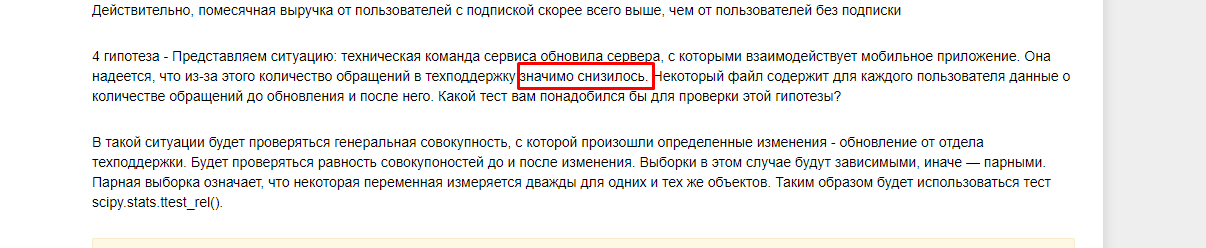 
</div>

Будут приведены следующие гипотезы:

Нулевая гипотеза - среднее кол-во обращений до и после обновления отдела техподдержки равны

Альтернативная гипотеза - среднее кол-во обращений до и после обновления отдела техподдержки не равны

Также можно проверить правосторонюю альтернативную гипотезу о том, что средне значение обращений в техподдержку до обновления больше, чем значение обращений после обновления. Это покажет корректную работу обновления сервера мобильного приложения

Можно сделать следующие выводы:
- гипотеза о том, что пользователи с подпиской тратят больше времени на поездки подтвердилась
- гипотеза о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3 130 метров, подтвердилась
- гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки подтвердилась
- в случае добавления значения о кол-ве обращения в техподдержку, релевантным будет т-тест двух парных выборок 

# Выводы

Была проведена следующая работа:
- были загружены и обработаны данные
- был проведен исследовательский анализ данных
- данные были объединены и приведены в надлежайший вид для проверки гипотез
- были составлены и проверены гипотезы
- были сделаны выводы

Согласно проверенным гипотезам, можно сказать что в среднем, пользователи с подпиской ездят на большие дистанции, чем пользователи без подписки, проезжают оптимальную дистанцию для эксплуатации самоката за одну поездку и помесячно приносят больше выручки, чем пользователи без подписки. Таким образом, фокусом компании могут оставаться пользователи с подпиской. Необходимо увеличивать конверсию для развития бизнеса

<div class="alert alert-info"> <b>Комментарий студента:</b> Изменил общие выводы.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо за совместную работу, желаю успехов в дальнейшем обучении) 
</div>